In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

/home/raviteja/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
movie_data = pd.read_csv("IMDb dataset/movies_metadata.csv")

In [3]:
movie_data.shape


(45485, 24)

In [4]:
movie_data.columns
movie_data["genres"]

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45480                                                  NaN
45481                                                  NaN
45482                                                  NaN
45483                                                  NaN
45484                                                  NaN
Name: genres, Length: 45485, dtype: object

In [5]:
movie_genres = ["Action","Adventure","Animation","Biography",
               "Comedy","Crime","Documentary","Drama","Family","Fantasy",
               "Film Noir","History","Horror","Music","Musical","Mystery",
               "Romance","Sci-Fi","Short Film","Sport","Superhero",
               "Thriller","War","Western"]

def get_genre(movie):
    if not pd.isna(movie):
        genre = re.compile(r".+\'name\'\: \'(\w+)\'\}")
       
        movie = movie.replace("[","").replace("]","")
        movie = movie.split(",")
        genre_list = []
        for gen in movie:
            try:
                genre_list.append("".join(genre.match(gen).groups()))
            except:
                continue

        return ",".join(genre_list)
    return ""
            
    

In [6]:
cols = ["adult","genres","original_language","original_title",
       "overview","vote_average","vote_vount"]

movie_data["Genre"] = movie_data["genres"].apply(get_genre)

In [7]:
drop_list = ["belongs_to_collection","homepage","imdb_id",
             "spoken_languages","status","video","genres",
            "poster_path","production_companies","production_countries",
             "poster_path"]

movie_data.drop(columns=drop_list,inplace=True)

In [8]:

movie_data["overview"].fillna("No Overview",inplace=True)
movie_data["tagline"].fillna("NoTagline",inplace=True)
movie_data["original_language"].fillna("nolang",inplace=True)

movie_data["vote_average"]=pd.to_numeric(movie_data["vote_average"],
                                        errors="coerce")
movie_data["popularity"]=pd.to_numeric(movie_data["popularity"],errors="coerce")
movie_data["vote_count"]=pd.to_numeric(movie_data["vote_count"],errors="coerce")

movie_data["popularity"].fillna(str(movie_data["popularity"].mean()),inplace=True)
movie_data["vote_average"].fillna(str(movie_data["vote_average"].mean()),inplace=True)
movie_data["vote_count"].fillna(str(movie_data["vote_count"].mean()),inplace=True)

In [9]:
movie_data.loc[movie_data["title"].isnull(),"title"] = movie_data["original_title"]

In [10]:
credits = pd.read_csv("IMDb dataset/credits.csv")


In [11]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [12]:
#finding the total number of crew involved.
crew = re.compile(r"(^\{.+\})")
def find_cast_count(x):
    
    x = x.replace("[","").replace("]","").replace("{","|")
    return (x.count('|'))
        
        
        
   
    

#print(credits["cast"][0])
credits["cast_count"] = credits["cast"].apply(find_cast_count)

In [13]:
keywords = pd.read_csv("IMDb dataset/keywords.csv")

In [14]:
def find_keywords_of_movie(movie):
    movie = movie.replace("[","").replace("]","").split(",")
    key_words = []
    for i in movie:
        if "name" in i:
            key_words.append(i.split(":")[1].replace("'","").replace("}",""))
    if not key_words:
        return "nokeywordavailable"
    return ",".join(key_words)       
    

In [15]:
keywords["keywords"]=keywords["keywords"].apply(find_keywords_of_movie)

In [16]:
keywords["keywords"]

0         jealousy, toy, boy, friendship, friends, riva...
1         board game, disappearance, "based on children...
2         fishing, best friend, duringcreditsstinger, o...
3         based on novel, interracial relationship, sin...
4         baby, midlife crisis, confidence, aging, daug...
                               ...                        
46414                                          tragic love
46415                                  artist, play, pinoy
46416                                   nokeywordavailable
46417                                   nokeywordavailable
46418                                   nokeywordavailable
Name: keywords, Length: 46419, dtype: object

In [17]:
movie_data.columns

Index(['adult', 'budget', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'tagline', 'title', 'vote_average', 'vote_count', 'Genre'],
      dtype='object')

In [18]:
movie_data.isna().sum()

adult                 21
budget                22
id                    22
original_language      0
original_title        22
overview               0
popularity             0
release_date         109
revenue               29
runtime              294
tagline                0
title                 22
vote_average           0
vote_count             0
Genre                  0
dtype: int64

In [19]:
movie_data["revenue"].dtype

dtype('float64')

In [20]:

movie_data["runtime"].fillna("0",inplace=True)
movie_data["runtime"] = movie_data["runtime"].astype('int32',copy=False)

In [21]:
movie_data["runtime"].fillna(movie_data["runtime"].mean(),inplace=True)

In [22]:
def get_year(year):
    year = str(year)
    if "-" in year:
        return int(year.split("-")[0])
    else:
        return 1888

In [23]:
movie_data["release_year"] = movie_data["release_date"].apply(get_year)

In [24]:
movie_data["cast_count"] = credits["cast_count"]

In [25]:
movie_data["key_words"] = keywords["keywords"]

In [26]:
movie_data.head()

,adult,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,Genre,release_year,cast_count,key_words
0,False,30000000.0,862.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,1995-10-30,373554033.0,81,NoTagline,Toy Story,7.7,5415,"Animation,Comedy,Family",1995,13.0,"jealousy, toy, boy, friendship, friends, riva..."
1,False,65000000.0,8844.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,1995-12-15,262797249.0,104,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,"Adventure,Fantasy,Family",1995,26.0,"board game, disappearance, ""based on children..."
2,False,0.0,15602.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92,"Romance,Comedy",1995,7.0,"fishing, best friend, duringcreditsstinger, o..."
3,False,16000000.0,31357.0,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,1995-12-22,81452156.0,127,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34,"Comedy,Drama,Romance",1995,10.0,"based on novel, interracial relationship, sin..."
4,False,0.0,11862.0,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,1995-02-10,76578911.0,106,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173,Comedy,1995,12.0,"baby, midlife crisis, confidence, aging, daug..."


In [27]:
def get_director(movie):
    #\s\'job\':\s'Director\',\s'name':\s'(\w+\s*\w+)
    direct = re.compile(r"\s\'job\':\s'Director\',\s'name':\s'(\w+\s*\w+)")
    movie = movie.replace('[',"").replace(']',"").replace("{","").replace("}","")
    directors_list = []
    director_name = direct.findall(movie)
    for name in director_name:
        directors_list.append("".join(name.split()))
    if not directors_list:
        return "unknown"
    return ",".join(directors_list)
        
get_director("[{'credit_id': '52fe44959251416c75039da9', 'department': 'Directing', 'gender': 2, 'id': 2226, 'job': 'Director', 'name': 'Sydney Pollack', 'profile_path': '/zxkoU2diKtvarV1Qk4z9He2lJj9.jpg'}, {'credit_id': '52fe44959251416c75039daf', 'department': 'Writing', 'gender': 1, 'id': 70846, 'job': 'Screenplay', 'name': 'Barbara Benedek', 'profile_path': None}, {'credit_id': '52fe44959251416c75039db5', 'department': 'Production', 'gender': 2, 'id': 2226, 'job': 'Producer', 'name': 'Sydney Pollack', 'profile_path': '/zxkoU2diKtvarV1Qk4z9He2lJj9.jpg'}, {'credit_id': '52fe44959251416c75039dbb', 'department': 'Sound', 'gender': 2, 'id': 491, 'job': 'Original Music Composer', 'name': 'John Williams', 'profile_path': '/2Ats98PB1SH2yfEPikiLdhRuXZm.jpg'}, {'credit_id': '52fe44959251416c75039dc7', 'department': 'Editing', 'gender': 2, 'id': 10640, 'job': 'Editor', 'name': 'Fredric Steinkamp', 'profile_path': None}, {'credit_id': '55a3b9c2c3a3681ce30058b3', 'department': 'Production', 'gender': 2, 'id': 2997, 'job': 'Producer', 'name': 'Scott Rudin', 'profile_path': '/zR8sdlGblto6dneAr2mckTowwEl.jpg'}, {'credit_id': '55a3ba349251412974005664', 'department': 'Production', 'gender': 2, 'id': 5490, 'job': 'Casting', 'name': 'David Rubin', 'profile_path': '/x22xlcu30x5s8jelEIkJVBeLHrn.jpg'}, {'credit_id': '569cf5c89251415e7000342f', 'department': 'Art', 'gender': 2, 'id': 1718, 'job': 'Production Design', 'name': 'Brian Morris', 'profile_path': None}, {'credit_id': '569cfb339251415e5e0033b3', 'department': 'Writing', 'gender': 2, 'id': 11056, 'job': 'Screenplay', 'name': 'David Rayfiel', 'profile_path': None}, {'credit_id': '569cf55ec3a36858e500357c', 'department': 'Costume & Make-Up', 'gender': 2, 'id': 10199, 'job': 'Makeup Artist', 'name': 'Peter Robb-King', 'profile_path': None}, {'credit_id': '569cf57c9251415e730030f4', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 142152, 'job': 'Makeup Artist', 'name': 'Bernadette Mazur', 'profile_path': None}, {'credit_id': '569cf5889251415e60003401', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 32489, 'job': 'Makeup Artist', 'name': 'Joseph A. Campayno', 'profile_path': None}, {'credit_id': '569cf5969251415e6700344c', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 83118, 'job': 'Hairstylist', 'name': 'Lynda Gurasich', 'profile_path': None}, {'credit_id': '569cf5a49251415e67003451', 'department': 'Costume & Make-Up', 'gender': 2, 'id': 1565199, 'job': 'Hairstylist', 'name': 'Stephen G. Bishop', 'profile_path': '/5S7vryn2PQWaYGm40GDvhO8PPUm.jpg'}, {'credit_id': '569cf5ff9251415e67003464', 'department': 'Costume & Make-Up', 'gender': 2, 'id': 543194, 'job': 'Co-Costume Designer', 'name': 'Gary Jones', 'profile_path': None}, {'credit_id': '569cf6199251415e60003413', 'department': 'Costume & Make-Up', 'gender': 1, 'id': 5493, 'job': 'Costume Design', 'name': 'Ann Roth', 'profile_path': None}, {'credit_id': '569cf6bc9251415e5e00330c', 'department': 'Art', 'gender': 2, 'id': 18173, 'job': 'Set Decoration', 'name': 'George DeTitta Jr.', 'profile_path': None}, {'credit_id': '569cf757c3a36858c60038d1', 'department': 'Art', 'gender': 1, 'id': 1467272, 'job': 'Set Decoration', 'name': 'Amy Marshall', 'profile_path': None}, {'credit_id': '569cf7679251415e6a0033d0', 'department': 'Art', 'gender': 0, 'id': 1535947, 'job': 'Art Department Coordinator', 'name': 'Miriam Schapiro', 'profile_path': None}, {'credit_id': '569cf77ac3a36858c60038d8', 'department': 'Sound', 'gender': 0, 'id': 91092, 'job': 'Sound mixer', 'name': 'Danny Michael', 'profile_path': None}, {'credit_id': '569cf7959251415e70003463', 'department': 'Sound', 'gender': 2, 'id': 1387195, 'job': 'Sound Re-Recording Mixer', 'name': 'Adam Jenkins', 'profile_path': None}, {'credit_id': '569cf7adc3a36858cb003171', 'department': 'Sound', 'gender': 0, 'id': 1368864, 'job': 'Sound Re-Recording Mixer', 'name': 'Chris Jenkins', 'profile_path': None}, {'credit_id': '569cf7bbc3a36858c60038de', 'department': 'Sound', 'gender': 0, 'id': 1345595, 'job': 'Sound Re-Recording Mixer', 'name': 'Scott Millan', 'profile_path': None}, {'credit_id': '569cf7cac3a36858e50035d1', 'department': 'Sound', 'gender': 0, 'id': 1404218, 'job': 'Supervising Sound Effects Editor', 'name': 'Myron Nettinga', 'profile_path': None}, {'credit_id': '569cf7d89251415e5e00332f', 'department': 'Sound', 'gender': 2, 'id': 1565200, 'job': 'Sound Effects Editor', 'name': 'Mitch Gettleman', 'profile_path': None}, {'credit_id': '569cf7e49251415e64003f8e', 'department': 'Sound', 'gender': 0, 'id': 1565201, 'job': 'Sound Effects Editor', 'name': 'Joe Earle', 'profile_path': None}, {'credit_id': '569cf7f6c3a36858c8003271', 'department': 'Sound', 'gender': 0, 'id': 1392125, 'job': 'Supervising Sound Editor', 'name': 'J. Paul Huntsman', 'profile_path': None}, {'credit_id': '569cf8059251415e67003498', 'department': 'Sound', 'gender': 0, 'id': 91096, 'job': 'Boom Operator', 'name': 'Andrew Schmetterling', 'profile_path': None}, {'credit_id': '569cf8199251415e64003f96', 'department': 'Editing', 'gender': 0, 'id': 95836, 'job': 'Dialogue Editor', 'name': 'Adam Sawelson', 'profile_path': None}, {'credit_id': '569cf82b9251415e64003f9a', 'department': 'Editing', 'gender': 0, 'id': 1555703, 'job': 'Dialogue Editor', 'name': 'Barbara Issak', 'profile_path': None}, {'credit_id': '569cf8469251415e670034a1', 'department': 'Editing', 'gender': 0, 'id': 1399061, 'job': 'Dialogue Editor', 'name': 'Benjamin Beardwood', 'profile_path': None}, {'credit_id': '569cf8869251415e670034ab', 'department': 'Directing', 'gender': 1, 'id': 1464541, 'job': 'Script Supervisor', 'name': 'Mary A. Kelly', 'profile_path': None}, {'credit_id': '569cf8b69251415e5e003350', 'department': 'Camera', 'gender': 0, 'id': 1391583, 'job': 'Still Photographer', 'name': 'Myles Aronowitz', 'profile_path': None}, {'credit_id': '569cf8c7c3a36858cb00318e', 'department': 'Camera', 'gender': 2, 'id': 1194262, 'job': 'Still Photographer', 'name': 'Brian Hamill', 'profile_path': '/ipkdNt295kdCw1I32XGZX5rVQC3.jpg'}, {'credit_id': '569cf8de9251415e5e003357', 'department': 'Camera', 'gender': 0, 'id': 20844, 'job': 'Camera Operator', 'name': 'Giovanni Fiore Coltellacci', 'profile_path': None}, {'credit_id': '569cf8fbc3a36858ce003385', 'department': 'Camera', 'gender': 2, 'id': 15131, 'job': 'Director of Photography', 'name': 'Giuseppe Rotunno', 'profile_path': None}, {'credit_id': '569cf9afc3a36858e500360b', 'department': 'Production', 'gender': 1, 'id': 53346, 'job': 'Casting Associate', 'name': 'Kate Dowd', 'profile_path': None}, {'credit_id': '569cfa989251415e7300317d', 'department': 'Costume & Make-Up', 'gender': 0, 'id': 957570, 'job': 'Assistant Costume Designer', 'name': 'Juliet Polcsa', 'profile_path': None}, {'credit_id': '569cfac1c3a36858c80032d3', 'department': 'Costume & Make-Up', 'gender': 1, 'id': 18513, 'job': 'Assistant Costume Designer', 'name': 'Michelle Matland', 'profile_path': None}, {'credit_id': '569cfafcc3a36858c80032e1', 'department': 'Costume & Make-Up', 'gender': 1, 'id': 1177713, 'job': 'Costume Supervisor', 'name': 'Donna Maloney', 'profile_path': None}, {'credit_id': '569cfb1d9251415e6a00345a', 'department': 'Editing', 'gender': 0, 'id': 1565207, 'job': 'First Assistant Editor', 'name': 'Karl F. Steinkamp', 'profile_path': None}, {'credit_id': '596e2af0c3a3686b17005fb6', 'department': 'Production', 'gender': 1, 'id': 11058, 'job': 'Executive Producer', 'name': 'Lindsay Doran', 'profile_path': None}, {'credit_id': '596e2b3ec3a3687f7e00ef37', 'department': 'Production', 'gender': 2, 'id': 4184, 'job': 'Executive Producer', 'name': 'Ronald L. Schwary', 'profile_path': None}, {'credit_id': '596e2b72c3a3686b1700603c', 'department': 'Art', 'gender': 2, 'id': 17220, 'job': 'Art Direction', 'name': 'John Kasarda', 'profile_path': None}, {'credit_id': '596e2bb69251412aa6002d41', 'department': 'Production', 'gender': 0, 'id': 1582414, 'job': 'Production Manager', 'name': 'Jean-Pierre Avice', 'profile_path': None}, {'credit_id': '596e2bc5c3a3687feb00ea43', 'department': 'Production', 'gender': 0, 'id': 1748870, 'job': 'Production Supervisor', 'name': 'Thomas A. Imperato', 'profile_path': None}, {'credit_id': '596e2bd3c3a3686b5a005a69', 'department': 'Production', 'gender': 2, 'id': 4184, 'job': 'Production Manager', 'name': 'Ronald L. Schwary', 'profile_path': None}, {'credit_id': '596e2c08c3a3687fae00f487', 'department': 'Production', 'gender': 2, 'id': 1853722, 'job': 'Casting Assistant', 'name': 'Bill Kaufman', 'profile_path': None}, {'credit_id': '596e2c35c3a3687fae00f4cb', 'department': 'Production', 'gender': 1, 'id': 1720, 'job': 'Casting Associate', 'name': 'Ronna Kress', 'profile_path': '/8LIqLvnE7EIWHC50j0gmSO275nR.jpg'}, {'credit_id': '596e2dea9251412d8600e9e4', 'department': 'Production', 'gender': 1, 'id': 9028, 'job': 'Location Manager', 'name': 'Sandrine Ageorges', 'profile_path': None}, {'credit_id': '596e2e2f9251412d4100ea9a', 'department': 'Production', 'gender': 0, 'id': 1123059, 'job': 'Location Manager', 'name': 'Joseph E. Iberti', 'profile_path': None}, {'credit_id': '596e2e589251412a73003035', 'department': 'Production', 'gender': 0, 'id': 1853729, 'job': 'Production Coordinator', 'name': 'Joanny Carpentier', 'profile_path': None}, {'credit_id': '596e2e939251412d4100eb03', 'department': 'Production', 'gender': 1, 'id': 1002581, 'job': 'Production Coordinator', 'name': 'Katherine Kennedy', 'profile_path': None}]")

'SydneyPollack'

In [28]:
credits["Directors"] = credits["crew"].apply(get_director)

In [29]:
movie_data["Directors"] = credits["Directors"]

In [30]:
credits["id"]

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45471    439050
45472    111109
45473     67758
45474    227506
45475    461257
Name: id, Length: 45476, dtype: int64

In [31]:

movie_data["vote_average"]=movie_data["vote_average"].astype("float")

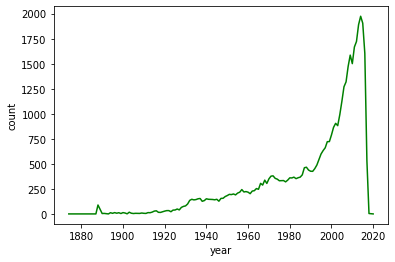

In [32]:
year_count = movie_data.groupby("release_year")["title"].count()
plt.plot(year_count,"g-");
plt.xlabel("year");
plt.ylabel("count");


# We can see that  there is a sharp increase in the number of movie released in 1990s and 2000s  

In [33]:
lang_count=movie_data["original_language"].value_counts().to_dict()

# Top 11 languages 


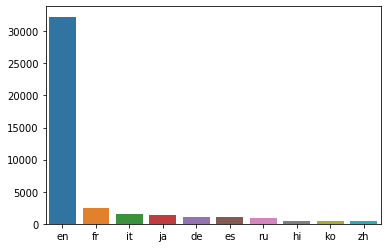

In [112]:
sb.barplot(x=list(lang_count.keys())[0:10],y=list(lang_count.values())[0:10]);

In [35]:
movie_data["revenue"].replace("0",np.nan,inplace=True)
movie_data["revenue"]= movie_data["revenue"].astype("float")

In [36]:
movie_data["budget"].replace("0",np.nan,inplace=True)
movie_data["budget"]= movie_data["budget"].astype("float")

In [37]:

movie_data["return"] = movie_data["revenue"]/movie_data["budget"]

In [38]:

movie_data["vote_count"]  = movie_data["vote_count"].astype("float")

# Most acclaimed movies

In [103]:
movie_data[movie_data["vote_count"]>11000][["Directors",
                                           "title",
                                           "release_year",
                                           "vote_average",
                                            "return"]].sort_values("vote_average",ascending=False).head(10)

,Directors,title,release_year,vote_average,return
12481,ChristopherNolan,The Dark Knight,2008,8.3,5.430046
15480,ChristopherNolan,Inception,2010,8.1,5.159580
22878,ChristopherNolan,Interstellar,2014,8.1,4.091636
17818,JossWhedon,The Avengers,2012,7.4,6.907081
26563,SantiagoSegura,Deadpool,2016,7.4,13.501948
14551,JamesCameron,Avatar,2009,7.2,11.763566


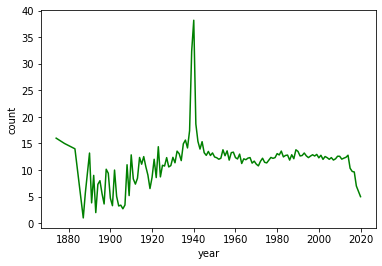

In [114]:
year_count = movie_data.groupby("release_year")["cast_count"].mean()
plt.plot(year_count,"g-");
plt.xlabel("year");
plt.ylabel("count");